<a href="https://colab.research.google.com/github/mjshafer-1/ECO6100/blob/master/Employee_Exit_Surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Exit Surveys #

## Summary of data ##
The data that we will be lookin at in this analysis comes from the Department of Education, Training, and Employment ([DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)) and the Technical and Further Education ([TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)) Institute from Queensland, Australia.

We are looking into the following questions posed by stakeholders:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below we will detail how we worked with the data as well as work to answer the questions from our stakeholders.


In [1]:
import pandas as pd
import numpy as np

dete = pd.read_csv('https://github.com/mjshafer-1/ECO6100/raw/master/dete.csv')
tafe = pd.read_csv('https://github.com/mjshafer-1/ECO6100/raw/master/tafe.csv',encoding='cp1252')
print(dete.info())
print('\n')
print(tafe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [2]:
print(dete.head())
print('\n')
print(tafe.head())

   ID                    SeparationType Cease Date  ... South Sea Disability NESB
0   1             Ill Health Retirement    08/2012  ...       NaN        NaN  Yes
1   2  Voluntary Early Retirement (VER)    08/2012  ...       NaN        NaN  NaN
2   3  Voluntary Early Retirement (VER)    05/2012  ...       NaN        NaN  NaN
3   4         Resignation-Other reasons    05/2012  ...       NaN        NaN  NaN
4   5                    Age Retirement    05/2012  ...       NaN        NaN  NaN

[5 rows x 56 columns]


            Record ID  ... LengthofServiceCurrent. Length of Service at current workplace (in years)
0  634133009996094000  ...                                                1-2                       
1  634133654064531000  ...                                                NaN                       
2  634138845606563000  ...                                                NaN                       
3  634139903350000000  ...                                                NaN  

In [3]:
print(dete['Torres Strait'].isnull().sum())
print('\n')
print(tafe['Main Factor. \xa0\xa0\xa0\xa0Which of these was the main factor for leaving?']
      .isnull().sum())


819


589


### Observations ###
Both datasets have a large number of columns, many of which contain a lot of null values. above are the two worst columns, "Torres Strait" for the DETE set and "Main Factor..." for the TAFE set. We will have to look closesly at and work around these columns in order to analyze the data effectively. 

In [4]:
dete = pd.read_csv('https://github.com/mjshafer-1/ECO6100/raw/master/dete.csv',
                   na_values = 'Not Stated')
dete_updated = dete.drop(dete.columns[28:49],axis = 1)
tafe_updated = tafe.drop(tafe.columns[17:66],axis=1)


## Changes to Data ##
We have changed some of the data in the DETE list to show as NaN, as opposed to previously saying Not Stated. Further, we have removed some of the extraneous columns from both datasets to make our analysis more streamlined. 

In [5]:
dete_updated.columns = dete_updated.columns.str.replace(' ','_').str.strip().str.lower()
tafe_updated.rename({'Record ID': 'id',
                     'CESSATION YEAR': 'cease_date',
                     'Reason for ceasing employment': 'separationtype',
                     'Gender. What is your Gender?': 'gender',
                     'CurrentAge. Current Age': 'age',
                     'Employment Type. Employment Type': 'employment_status',
                     'Classification. Classification': 'position',
                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
                     'CurrentAge. \xa0\xa0\xa0\xa0Current Age':'age'},axis=1,inplace=True)
print(dete_updated.head())
print(tafe_updated.head())

   id                    separationtype cease_date  ...  south_sea  disability nesb
0   1             Ill Health Retirement    08/2012  ...        NaN         NaN  Yes
1   2  Voluntary Early Retirement (VER)    08/2012  ...        NaN         NaN  NaN
2   3  Voluntary Early Retirement (VER)    05/2012  ...        NaN         NaN  NaN
3   4         Resignation-Other reasons    05/2012  ...        NaN         NaN  NaN
4   5                    Age Retirement    05/2012  ...        NaN         NaN  NaN

[5 rows x 35 columns]
                   id  ... role_service
0  634133009996094000  ...          1-2
1  634133654064531000  ...          NaN
2  634138845606563000  ...          NaN
3  634139903350000000  ...          NaN
4  634146578511788000  ...          3-4

[5 rows x 23 columns]


## Renaming Columns ##
Above we have renamed many of the columns in order to make our code easier to both read and write. This will also make it so any visualizations will be easily understood.

In [6]:
print(dete_updated['separationtype'].value_counts())
print('\n')
print(tafe_updated['separationtype'].value_counts())


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [7]:
tafe_resignations = tafe_updated[tafe_updated['separationtype']=='Resignation']
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [8]:
mask = ((dete_updated['separationtype'] =='Resignation-Other reasons') | (dete_updated['separationtype'] == 'Resignation-Other employer') | (dete_updated['separationtype'] == 'Resignation-Move overseas/interstate'))
mask.value_counts()

False    511
True     311
Name: separationtype, dtype: int64

In [9]:
dete_resignations = dete_updated[mask]
dete_resignations['separationtype'].value_counts()              

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

## Filtering Data ##
We chose to include only rows that had individuals that chose to resign. This leaves us with 311 rows in the DETE set and 340 rows in the TAFE set. This will help us be more focused in our analysis of these datasets.

In [10]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [11]:
dete_resignations = dete_resignations.copy()

In [12]:
pattern = r"(?P<Year>20[0-9]{2})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern,expand=True).astype(float)

In [13]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [14]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [15]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

## Examining Dates ##
After standardizing all of the dates to be 4 digit years saved as floats, we can see that both datasets are relatively normal, with the exception of a few datapoints that look a little strange. 

In [16]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

## Adding institute_service column ##
The column added above shows us how many years each employee was with DETE. We will now be able to use this data directly for a more in-depth analysis.

In [17]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [18]:
def update_vals(val):
  if pd.isnull(val):
    return np.nan
  elif val == '-':
    return False
  else:
    return True

In [19]:
tafe_resignations = tafe_resignations.copy()
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]
                                     .applymap(update_vals).any(axis=1,skipna=False))

In [20]:
dete_list = ['job_dissatisfaction',
             'dissatisfaction_with_the_department',
             'physical_work_environment',
             'lack_of_recognition',
             'lack_of_job_security',
             'work_location',
             'employment_conditions',
             'work_life_balance',
             'workload']
dete_resignations[dete_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   job_dissatisfaction                  311 non-null    bool 
 1   dissatisfaction_with_the_department  311 non-null    bool 
 2   physical_work_environment            311 non-null    bool 
 3   lack_of_recognition                  311 non-null    bool 
 4   lack_of_job_security                 311 non-null    bool 
 5   work_location                        311 non-null    bool 
 6   employment_conditions                311 non-null    bool 
 7   work_life_balance                    311 non-null    bool 
 8   workload                             311 non-null    bool 
dtypes: bool(9)
memory usage: 5.2 KB


In [21]:
dete_resignations = dete_resignations.copy()
dete_resignations['dissatisfied'] = dete_resignations[dete_list].any(axis=1,skipna=False)

In [22]:
print(dete_resignations['dissatisfied'].value_counts())
print('\n')
print(tafe_resignations['dissatisfied'].value_counts())

False    162
True     149
Name: dissatisfied, dtype: int64


False    241
True      91
Name: dissatisfied, dtype: int64


## Finding Dissatisfied Workers ##
The above code looks through existing data to find which of the employees resigned due to job dissatisfaction, for one reason or another. This creates a new column of data that simply says True if any other column indicates dissatisfaction with the job. We can see from the value_count on each set that in most cases job dissatisfaction was not a reason for resigning, but it was more prevelant in DETE than in TAFE.

In [23]:
dete_resignations['institute']= 'DETE'
tafe_resignations['institute']= 'TAFE'

In [24]:
combined = pd.concat([dete_resignations,tafe_resignations])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 56 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    int64  
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             308 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [25]:
combined_u = combined.dropna(axis = 1, thresh = 500)
combined_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    int64  
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   age                596 non-null    object 
 4   institute_service  563 non-null    object 
 5   dissatisfied       643 non-null    object 
 6   institute          651 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 40.7+ KB


## Combining and Clearing Data ##
Above, we combine the two datasets into a single DataFrame "Combined" so that we can fully analyze all of the data present. Looking at "Combined", it is clear that many of the columns contain little information, especially between the institutes. We chose to remove any column that has more than 500 null values, since they do not provide us enough information to analyze. We are now down to a more reasonable 7 columns and 651 rows for our final analysis.

In [26]:
combined_u = combined_u.copy()
combined_u['institute_service'] = combined_u['institute_service'].astype(str)
combined_u['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
17.0                   6
22.0                   6
12.0                   6
10.0                   6
14.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [27]:
combined_u['institute_service_u'] = combined_u['institute_service'].str.extract(r'(\d+)').astype(float)
combined_u['institute_service_u'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_u, dtype: int64

In [28]:
def career_stage(year):
  if pd.isnull(year):
    return np.nan
  elif year >= 11:
    return 'Veteran'
  elif 7 <= year <=10:
    return 'Established'
  elif 3<= year <= 6:
    return 'Experienced'
  else:
    return 'New'
combined_u['service_cat']= combined_u['institute_service_u'].apply(career_stage)
combined_u['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Categorizing Service Length ##
The above code looks through the institute_service column and standardizes to a float. It then categorizes the data by the below criteria:

| Name | Criteria |
| --- | --- |
| New | Less than 3 years at a company |
| Experienced | 3-6 years at a company |
| Established | 7-10 years at a company |
| Veteran | 11 or more years at a company |

These groups will make it easier for us to both analyze the data, as well as reporting our findings. 

In [29]:
combined_u['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [30]:
combined_u['dissatisfied'].fillna(False)

3      False
5       True
8      False
9       True
11     False
       ...  
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 651, dtype: bool

In [31]:
combined_u['dissatisfied'] = combined_u['dissatisfied'].astype(bool)
combined_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   651 non-null    int64  
 1   separationtype       651 non-null    object 
 2   cease_date           635 non-null    float64
 3   age                  596 non-null    object 
 4   institute_service    651 non-null    object 
 5   dissatisfied         651 non-null    bool   
 6   institute            651 non-null    object 
 7   institute_service_u  563 non-null    float64
 8   service_cat          563 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 46.4+ KB


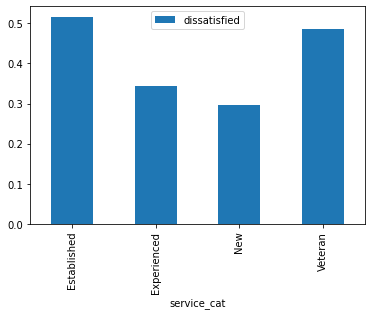

In [32]:
combpv = pd.pivot_table(combined_u,index='service_cat', values='dissatisfied')

%matplotlib inline
combpv.plot(kind='bar')

## % Dissatisfied by Experience Level ##
We can see from the chart above that the two longest serving groups leave due to dissatisfaction more often than the two less experienced groups. Both of the older groups are approaching 50% of resignations being due to dissatisfaction. This descrepency may be due to the less experienced groups making changes to their careers early and moving jobs without being dissatisfied, or it may be that the more expeienced groups are dissatisfied with the changes that have occured over the years. Additionally, it may be the case that less experienced employees may be less comfortable reporting their dissatisfaction even after resigning, and the data may have some bias as a result.

In [33]:
combined_u['age'].value_counts()

51-55            71
41-45            48
41 – 45          45
46-50            42
36-40            41
46 – 50          39
26-30            35
21 – 25          33
26 – 30          32
31 – 35          32
36 – 40          32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [34]:
combined_u['age_u'] = combined_u['age'].astype(str).str.extract(r"(\d+)")
combined_u['age_u'] = combined_u['age_u'].astype(float)
combined_u['age_u'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age_u, dtype: int64

In [61]:
def age_range(val):
  if pd.isnull(val):
    return np.nan
  elif val > 50:
    return 'Over 50'
  elif 50 >= val >= 40:
    return "40's"
  elif 40 > val >= 30:
    return "30's"
  else:
    return 'Under 30'
combined_u['age_cat'] = combined_u['age_u'].apply(age_range)
combined_u['age_cat'] = combined_u['age_cat'].fillna("40's")
combined_u['age_cat'].value_counts(dropna=False)

40's        229
Over 50     149
Under 30    139
30's        134
Name: age_cat, dtype: int64

Text(0.5, 1.0, 'Age and Dissatisfaction')

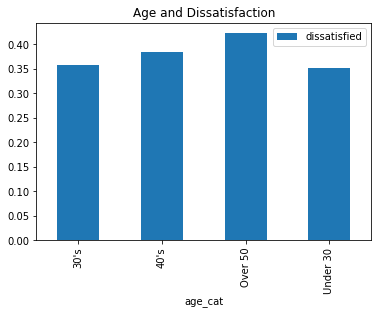

In [62]:
agepv = pd.pivot_table(combined_u, index='age_cat',values='dissatisfied')
agepv.plot(kind='bar').set_title('Age and Dissatisfaction')

## Dissatisfaction by Age Group ##
Above is a chart detailing the percentage of each age group that resigned due to being dissatisfied. These show an upward trend in dissatisfaction with age; that is, older employees tend to resign more due to dissatisfaction than younger employees. Although the difference is somewhat small (only roughly 5%), this may indicate a problem with how the institutes work with older employees. As said above, younger employees may be less likely to report dissatisfaction after resigning.

Text(0.5, 1.0, 'Dissatisfaction by Age and Experience Level')

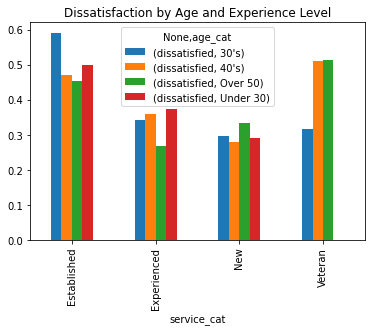

In [63]:
finalpv=pd.pivot_table(combined_u, index=['service_cat'],columns=['age_cat'],values=['dissatisfied'])
finalpv.plot(kind='bar',legend={reversed}).set_title('Dissatisfaction by Age and Experience Level')

# Conclusion #
The above chart, which combines the data presented in the two previous charts, indicates that the most dissatisfied group are employees in their 30's who have between 7 and 10 years of experience, followed by older veterans. This is similar to our earlier analysis, where we said it may be the case that more experienced and older employees are more likely to be dissatisfied. This may be due to multiple reasons, including:
- Changes in the workplace
- Age discrimination
- Bias in reporting 
  - Older employees more likely to report dissatisfaction

Further analysis with more data may be needed to properly examine the root cause of employee dissatisfaction.